# Project for Machine Learning classes
## Stars classification

Done by:
- Antoni Klorek
- Magda Kobusińska
- Szymon Skwarek

# Data input
We decided to use the dataset from Kaggle website about the stars classification: https://www.kaggle.com/brsdincer/star-type-classification?fbclid=IwAR106FbKcyjNArJvyXg2OdQHNajGs0_K8DriYtPrmWpyEEDIzohw1aiMREA

In [271]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # for graphics
import seaborn as sns # for graphics

In [272]:
# read the dataset
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Column definitions:

- Temperature - Temperature of the star, expressed in degrees of Kelvin: (K)
- L - Relative luminosity, expressed in terms of nominal solar luminosity: (L/L⊙)
- R - Relative radius, expressed in terms of nominal solar radius: (R/R⊙)
- A_M - Absolute magnitude, expressed in: (Mv)
- Color - Observable color of the star
- Spectral_Class - Spectral class of the star, classified under the Morgan–Keenan (MK) system
- Type - Type of the star:
    - Red Dwarf - 0
    - Brown Dwarf - 1
    - White Dwarf - 2
    - Main Sequence - 3
    - Super Giant - 4
    - Hyper Giant - 5

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Basic observations on numerical variables
First of all, we can notice that the type distribution is almost perfect.

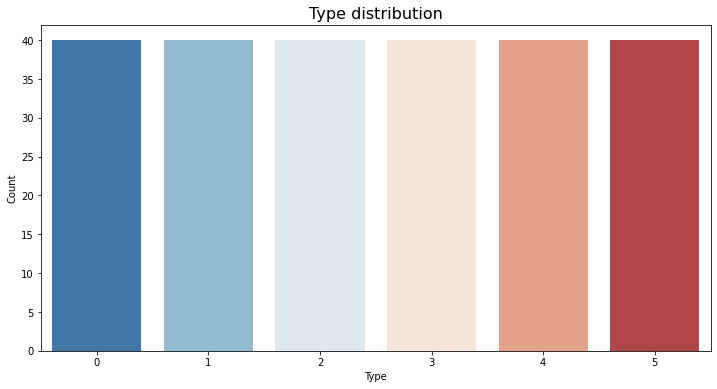

In [274]:
#Type distribution
plt.figure(figsize=(12, 6))
sns.countplot(x="Type", data=df, palette='RdBu_r')
plt.title("Type distribution", fontsize=16)
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks
plt.yticks
plt.show()

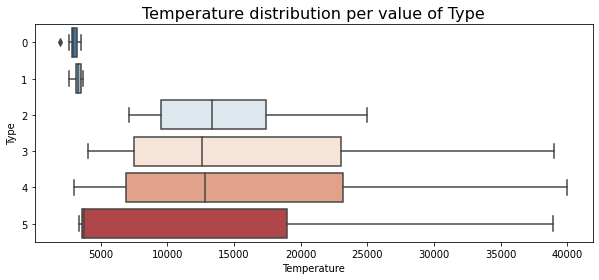

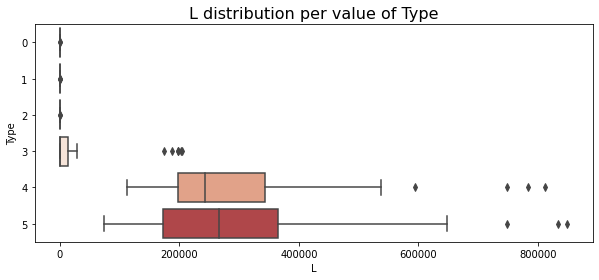

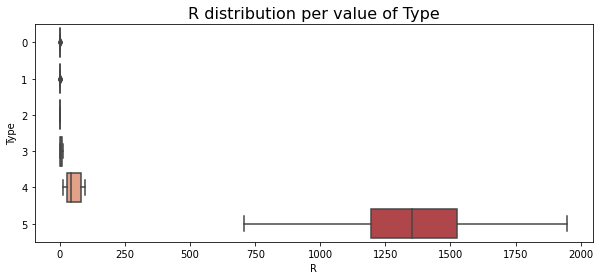

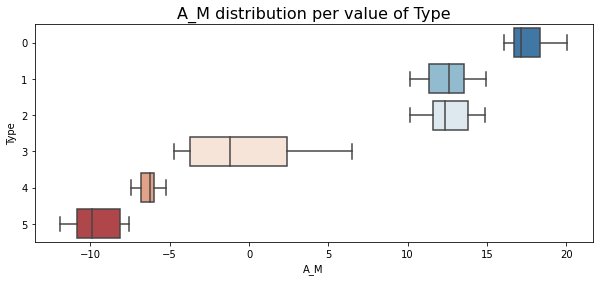

In [275]:
df_numerical_vars = df.loc[:, ["Temperature", "L", "R", "A_M"]]

for col_name in df_numerical_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(y="Type", x=col_name, data=df, orient="h", palette='RdBu_r')
    plt.title(col_name + " distribution per value of Type", fontsize=16)
    plt.xlabel(col_name)
    plt.ylabel("Type")
    plt.show()

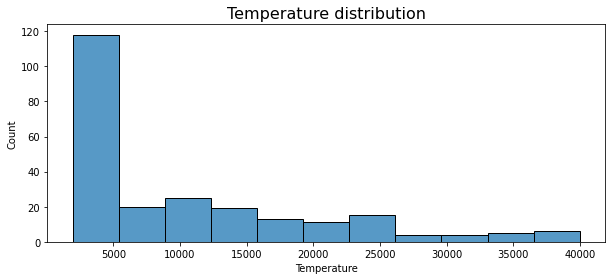

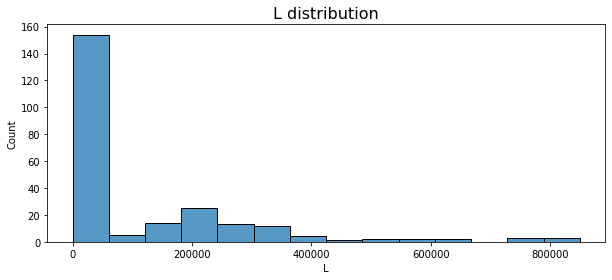

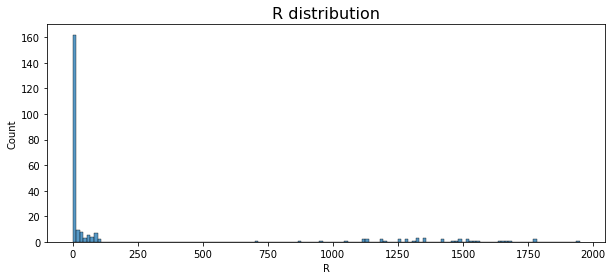

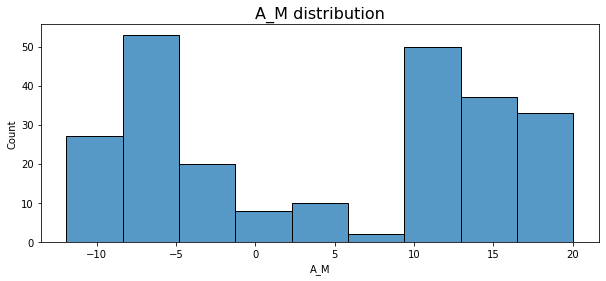

In [276]:
for col_name in df_numerical_vars:
    
    plt.figure(figsize=(10, 4))
    sns.histplot(x=col_name, data=df_numerical_vars, palette='RdBu_r')
    plt.title(col_name + " distribution", fontsize=16)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

In [277]:
corrPearson = df_numerical_vars.corr(method="pearson")
corrSpearman = df_numerical_vars.corr(method="spearman")

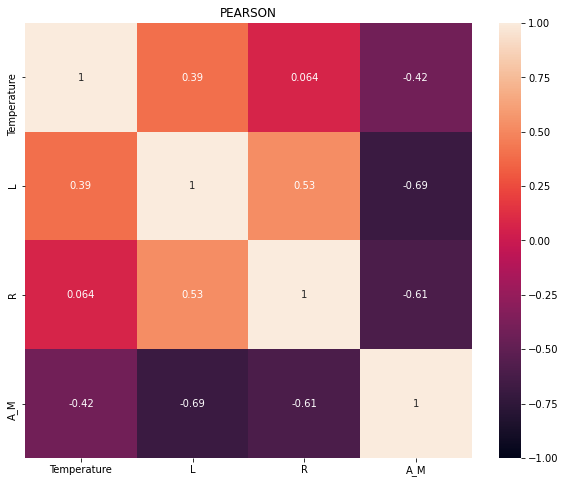

In [278]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True, vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.show()

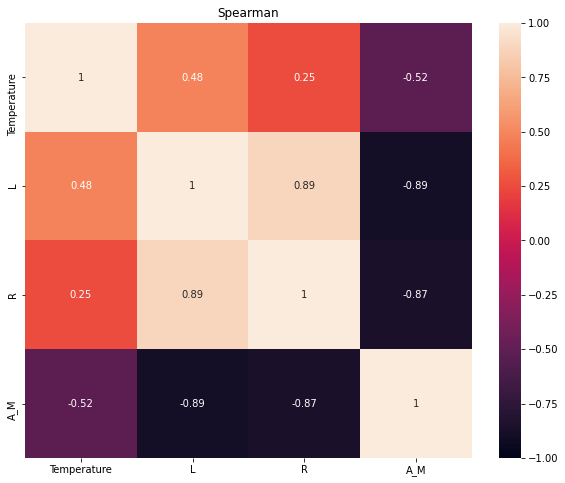

In [279]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True, vmin=-1, vmax=+1)
plt.title("Spearman")
plt.show()

# Categorical variables preprocessing and observations
## Color and spectral class
There two classes are categorical variables, so we needed to modify them so that we'll be albe to use them in the classification. What's more, we noticed some colors are almost identical, but named differently (e.g 'Blue-white' and 'Blue White'), so we had to standardise the names while performing preprocessing.

In [280]:
categorical_col=["Color","Spectral_Class"]
for elem in categorical_col:
    print(elem,":",len(df[elem].unique()))
    
df['Color'].value_counts()

Color : 17
Spectral_Class : 7


Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Orange                  2
Whitish                 2
yellowish               2
Pale yellow orange      1
Yellowish               1
White-Yellow            1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [281]:
# rename the colors
fixed_names = {
    'Red' : 'red', 
    'Blue' : 'blue', 
    'Blue-white' : 'blue-white', 
    'Blue White' : 'blue-white', 
    'yellow-white' : 'yellow-white', 
    'White' : 'white',
    'Blue white' : 'blue-white', 
    'white' : 'white', 
    'Yellowish White' : 'yellowish-white', 
    'yellowish' : 'yellow', 
    'Orange' : 'orange',
    'Whitish' : 'whitish', 
    'Yellowish' : 'yellowish', 
    'Blue-White' : 'blue-white', 
    'Pale yellow orange' : 'pale-yellow-orange',
    'Orange-Red' : 'orange-red', 
    'White-Yellow' : 'yellow-white' 
}

#change the names in the dataset
df['Color_name'] = df['Color'].map(fixed_names).astype('category')
df["Color_name"].value_counts()

red                   112
blue                   56
blue-white             41
white                  10
yellow-white            9
yellowish-white         3
orange                  2
whitish                 2
yellow                  2
orange-red              1
pale-yellow-orange      1
yellowish               1
Name: Color_name, dtype: int64

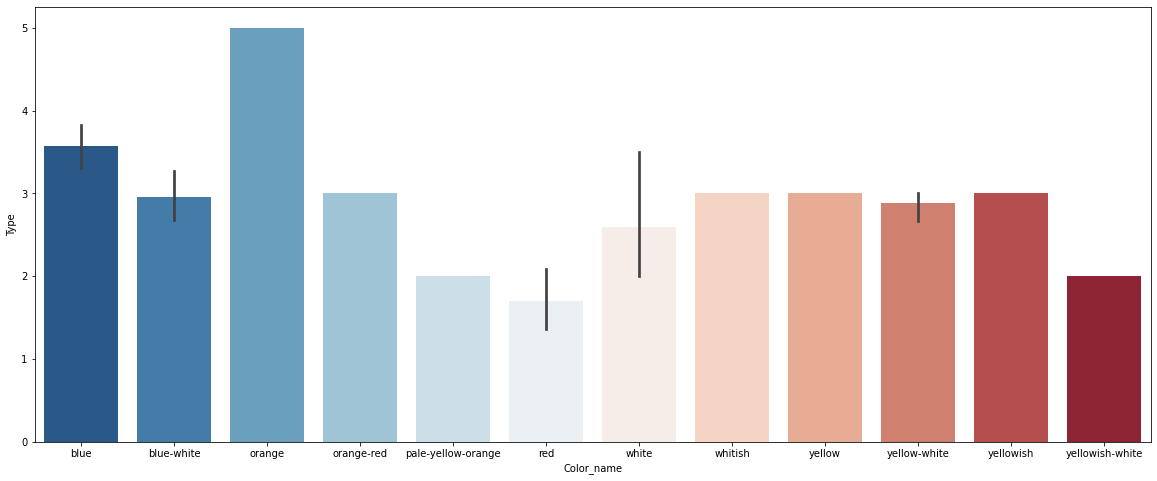

In [282]:
# Color distribution
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Color_name", y="Type", data=df, palette='RdBu_r')
plt.show()

In [283]:
color_id = {
    'red' : 0,
    'blue' : 1,
    'blue-white' : 2,
    'white' : 3,
    'yellow-white' : 4,
    'yellowish-white' : 5,
    'orange' : 6,
    'whitish' : 7,
    'yellow' : 8,
    'orange-red' : 9,
    'pale-yellow-orange' : 10,
    'yellowish' : 11,
}

df["Color_id"] = df["Color_name"].map(color_id)
df["Color_id"].unique()

# available 'Color_name' and 'Color_id', so columns 'Color' may be deleted
del df["Color"]

## Spectral classes

In [284]:
df["Spectral_Class"].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

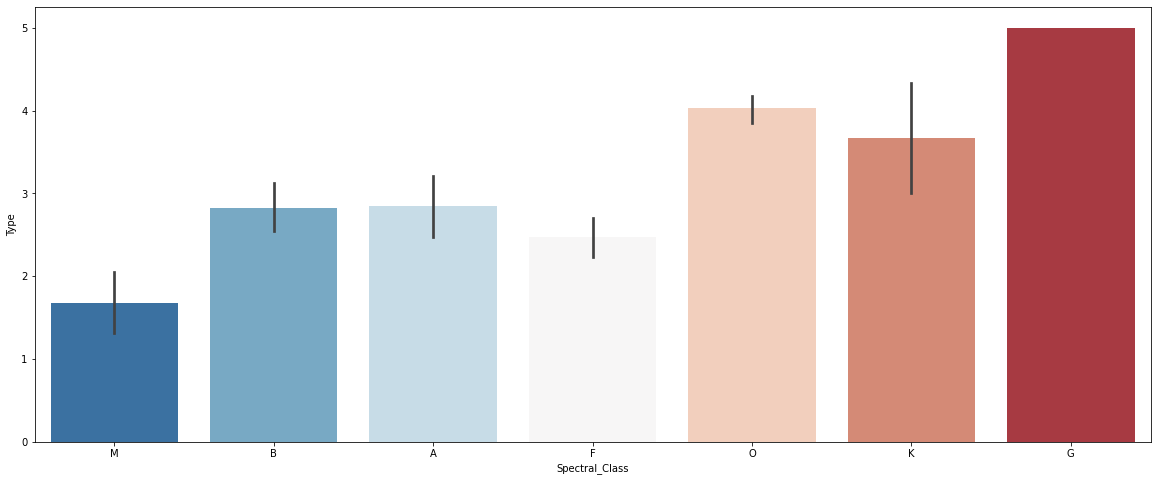

In [285]:
# spectral classes
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Spectral_Class", y="Type", data=df, palette='RdBu_r')
plt.show()

In [286]:
df["Spectral_Class_name"] = df["Spectral_Class"]

spectral_class_id = {
    "M": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "O": 4,
    "K": 5,
    "G": 6
}

df["Spectral_Class_id"] = df["Spectral_Class_name"].map(spectral_class_id)
df["Spectral_Class_id"].unique()
del df["Spectral_Class"]

In [287]:
# show table after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Temperature          240 non-null    int64   
 1   L                    240 non-null    float64 
 2   R                    240 non-null    float64 
 3   A_M                  240 non-null    float64 
 4   Type                 240 non-null    int64   
 5   Color_name           240 non-null    category
 6   Color_id             240 non-null    category
 7   Spectral_Class_name  240 non-null    object  
 8   Spectral_Class_id    240 non-null    int64   
dtypes: category(2), float64(3), int64(3), object(1)
memory usage: 14.5+ KB


## Other plots/correlations

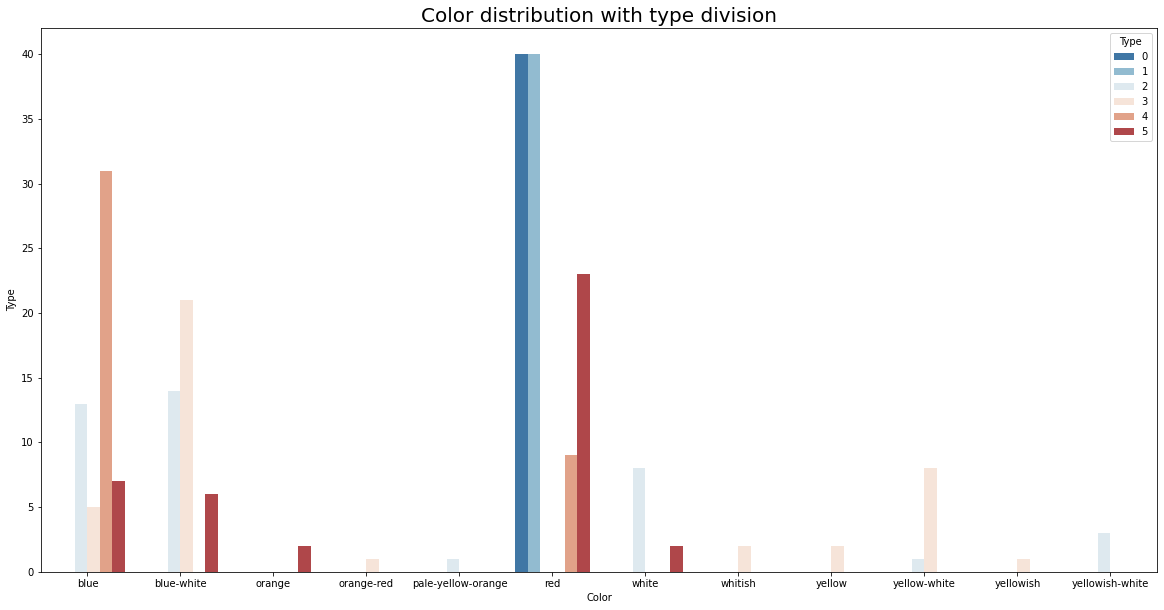

In [288]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Color_name", hue="Type", data=df, palette='RdBu_r')
plt.title("Color distribution with type division", fontsize=20)
plt.xlabel("Color")
plt.ylabel("Type")
plt.legend(loc="upper right", title="Type")
plt.show()

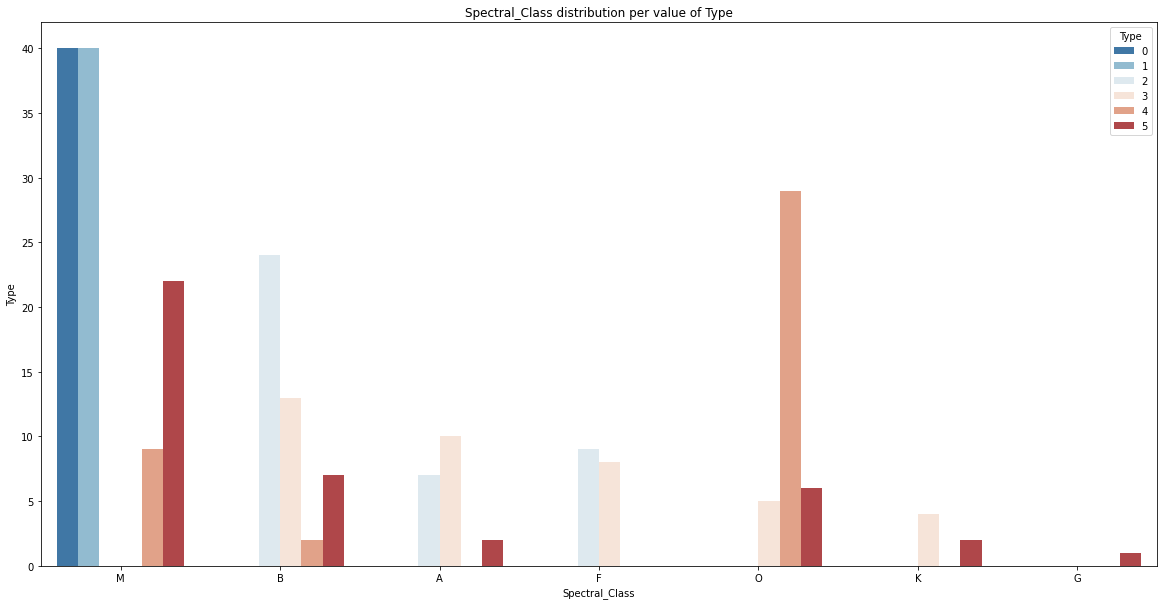

In [289]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Spectral_Class_name", hue="Type", data=df, palette='RdBu_r')
plt.title("Spectral_Class distribution per value of Type")
plt.xlabel("Spectral_Class")
plt.ylabel("Type")
plt.legend(loc="upper right", title="Type")
plt.show()

## One-hot encoding
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application. Most common type of categorical encoding is One Hot Encoding (also known as dummy encoding) where each categorical level becomes a separate feature in the dataset containing binary values (1 or 0).

In [290]:
df=pd.get_dummies(data=df,columns=["Color_name","Spectral_Class_name"])
print(df.head())

   Temperature         L       R    A_M  Type Color_id  Spectral_Class_id  \
0         3068  0.002400  0.1700  16.12     0        0                  0   
1         3042  0.000500  0.1542  16.60     0        0                  0   
2         2600  0.000300  0.1020  18.70     0        0                  0   
3         2800  0.000200  0.1600  16.65     0        0                  0   
4         1939  0.000138  0.1030  20.06     0        0                  0   

   Color_name_blue  Color_name_blue-white  Color_name_orange  ...  \
0                0                      0                  0  ...   
1                0                      0                  0  ...   
2                0                      0                  0  ...   
3                0                      0                  0  ...   
4                0                      0                  0  ...   

   Color_name_yellow-white  Color_name_yellowish  Color_name_yellowish-white  \
0                        0                

## Splitting the datasets (training and testing)
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
It is a fast and easy procedure to perform, the results of which allow us to compare the performance of machine learning algorithms for our predictive modeling problem.
We decided to split it in ratio 4:1, so that 80% of data is in training set, and then 20% is in test set.

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [292]:
x=df.drop("Type",axis=1)
y=df["Type"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [293]:
print(x_train.shape)
print(x_test.shape)

(192, 25)
(48, 25)


In [294]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## LazyPredict
We decided to start with an experiment and apply LazyPredict function. LazyPredict generates all the basic machine learning algorithms’ performances on the model. Along with the accuracy score, it provides certain evaluation metrics and the time taken by each model. So, after knowing how our model looks like with different classifiers, we could choose some nice classifiers to delve into them more.

In [296]:
from lazypredict.Supervised import LazyClassifier
lazyclassifier = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazyclassifier.fit(x_train, x_test, y_train, y_test)
print(models)

ModuleNotFoundError: No module named 'sklearn.utils.testing'

## SVM

In [297]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import make_pipeline
# clf = svm.SVC(C = 100000000, gamma=0.00000000001) # can use another kernel like linear
# y_pred = clf.predict(x_test)

In [298]:
def performSVM(kernel, c = 1):
    clf = svm.SVC(kernel = kernel, C = c,decision_function_shape='ovo')
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)
    return y_pred
performSVM("linear", c = 3)
metrics.accuracy_score(y_test, y_pred)

1.0

In [299]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 7  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



### Maybe try to perform linear discriminant analysis

In [300]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_scaled,y_train)
y_pred = clf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred))

1.0


## SGD Classifier

In [301]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha =1e-8, random_state = 0) # it is enough to slightly decrease alpha
clf.fit(x_train_scaled, y_train)

SGDClassifier(alpha=1e-08, random_state=0)

In [302]:
y_pred= clf.predict(x_test_scaled)
metrics.accuracy_score(y_test, y_pred)

1.0

## Decision Tree Classifier
A Decision Tree is a Supervised Machine Learning method where the data is continuously split according to a certain parameter.There are two main types of Decision Trees: classification trees and regression trees.

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text

### Classification Tree
Such a tree is built through a process known as binary recursive partitioning. This is an iterative process of splitting the data into partitions, and then splitting it up further on each of the branches.

We decided to give three different representations of DecisionTreeClassifier, but we believe the trirg one is the best and is definitely the most clear.
Also, interesting fact is that actually only two features are needed for Tree Classification - R (Relative radius) and A_M (Absolute magnitude).

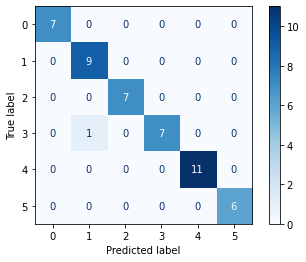

In [304]:
tree_classifier = DecisionTreeClassifier(max_depth = 7, random_state = 100)
tree_classifier.fit(x_train, y_train)
y_pred = tree_classifier.predict(x_test)
plot_confusion_matrix(tree_classifier, x_test, y_test, cmap=plt.cm.Blues)

In [305]:
print("Classification report:")
report = classification_report(y_test, y_pred, output_dict=True)
table = pd.DataFrame(report).transpose()
table.at['accuracy','precision']=None
table.at['accuracy','recall']=None
table.at['accuracy','support']=48
table = table.fillna('')
display(table)

Classification report:


,precision,recall,f1-score,support
0,1.0,1.0,1.000000,7.0
1,0.9,1.0,0.947368,9.0
2,1.0,1.0,1.000000,7.0
3,1.0,0.875,0.933333,8.0
4,1.0,1.0,1.000000,11.0
5,1.0,1.0,1.000000,6.0
accuracy,,,0.979167,48.0
macro avg,0.983333,0.979167,0.980117,48.0
weighted avg,0.98125,0.979167,0.979020,48.0


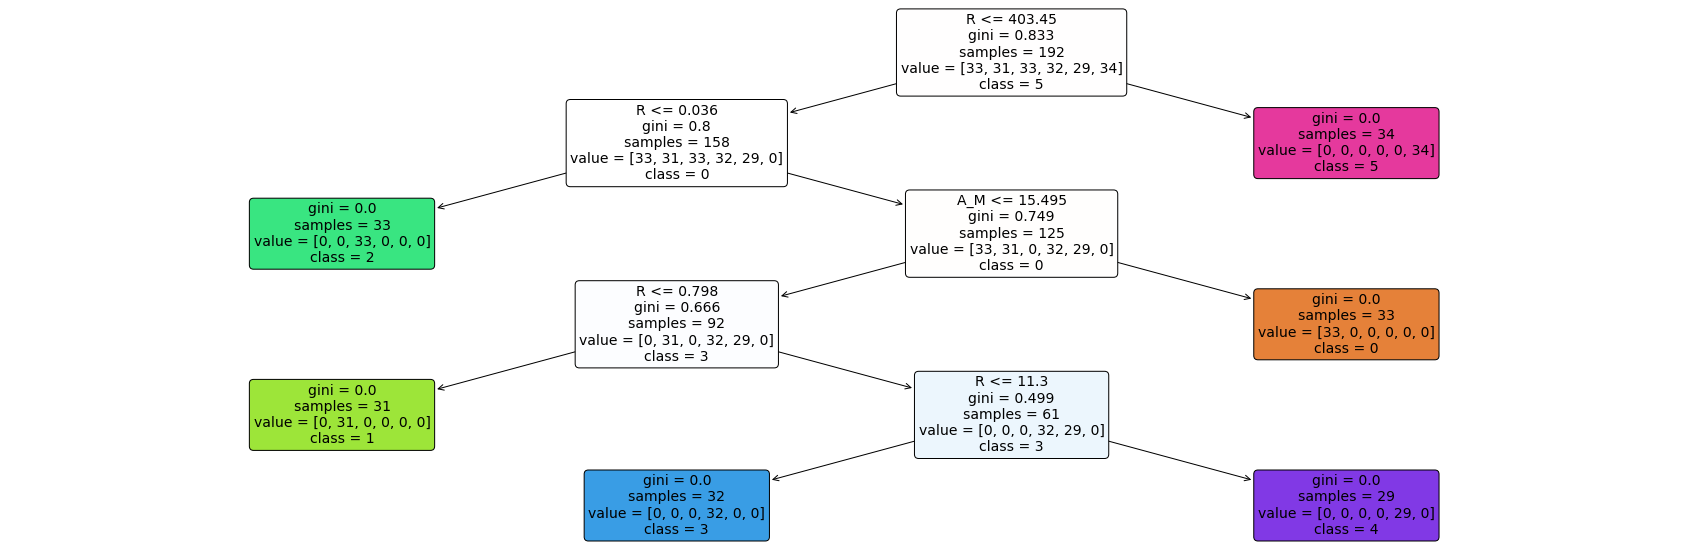

In [306]:
x = df.drop(columns="Type")
y = df["Type"]

feature_names = x.columns
labels = y.unique()
labels = [",".join(item) for item in labels.astype(str)]

plt.figure(figsize=(30,10))
a = tree.plot_tree(tree_classifier,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [307]:
tree_rules = export_text(tree_classifier, feature_names = list(feature_names))
print(tree_rules)

|--- R <= 403.45
|   |--- R <= 0.04
|   |   |--- class: 2
|   |--- R >  0.04
|   |   |--- A_M <= 15.49
|   |   |   |--- R <= 0.80
|   |   |   |   |--- class: 1
|   |   |   |--- R >  0.80
|   |   |   |   |--- R <= 11.30
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- R >  11.30
|   |   |   |   |   |--- class: 4
|   |   |--- A_M >  15.49
|   |   |   |--- class: 0
|--- R >  403.45
|   |--- class: 5



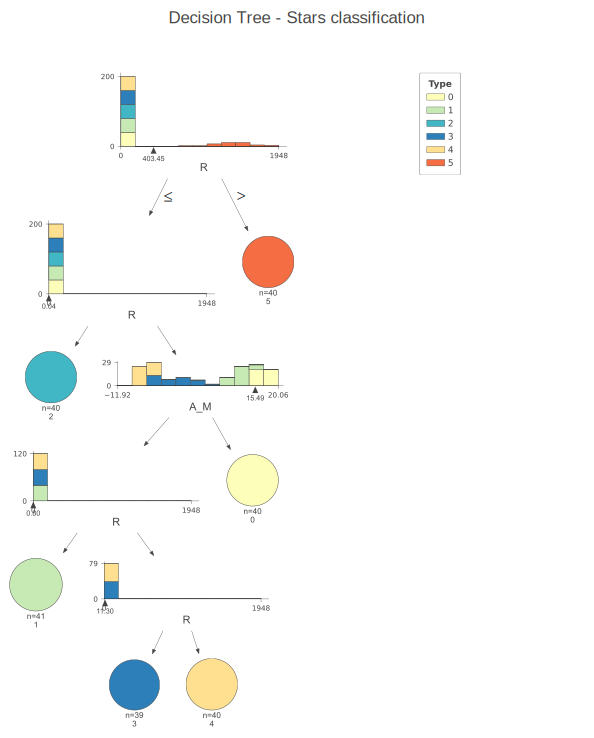

In [312]:
import graphviz
from dtreeviz.trees import *

viz = dtreeviz(tree_classifier, 
                x_data = x, 
                y_data = y,
                target_name="Type",
                feature_names=feature_names,
                class_names=list(labels), 
                title="Decision Tree - Stars classification",
                scale=1.2)


viz.save("decision_tree.svg")
viz

### Regression Decision Tree
Target variable can take continuous values, so not the best choice here.

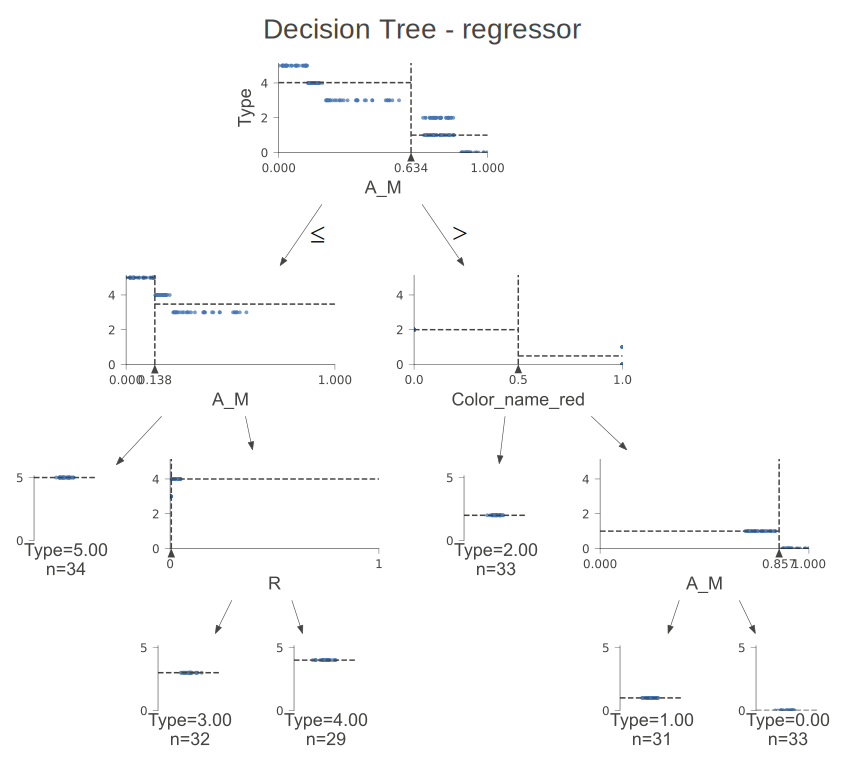

In [270]:
reg = tree.DecisionTreeRegressor(max_depth=7, random_state=42)
reg.fit(x_train, y_train)

# plot the tree
viz = dtreeviz(reg,
                x_data=x_train,
                y_data=y_train,
                target_name='Type',
                feature_names=feature_names,
                title="Decision Tree - regressor",
                scale = 2)

viz.save("decision_tree_regressor.svg")
viz

## KNN

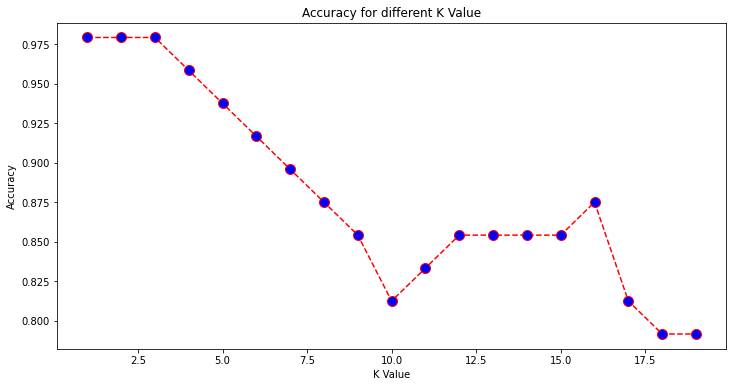

KNN accuracy for k=3, 80/20 split: 97.92%

Confusion matrix:


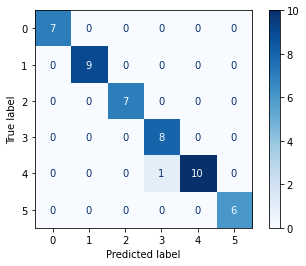


Classification report:


,precision,recall,f1-score,support
0,1.0,1.0,1.000000,7.0
1,1.0,1.0,1.000000,9.0
2,1.0,1.0,1.000000,7.0
3,0.888889,1.0,0.941176,8.0
4,1.0,0.909091,0.952381,11.0
5,1.0,1.0,1.000000,6.0
accuracy,,,0.979167,48.0
macro avg,0.981481,0.984848,0.982260,48.0
weighted avg,0.981481,0.979167,0.979283,48.0



Accuracy for k=3 with 10-fold cross validation: 93.33%


In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

dataset = df

#Normalize
dataset['Temperature'] = (dataset['Temperature'] - dataset['Temperature'].min()) / (dataset['Temperature'].max() - dataset['Temperature'].min())
dataset['L'] = (dataset['L'] - dataset['L'].min()) / (dataset['L'].max() - dataset['L'].min())
dataset['R'] = (dataset['R'] - dataset['R'].min()) / (dataset['R'].max() - dataset['R'].min())
dataset['A_M'] = (dataset['A_M'] - dataset['A_M'].min()) / (dataset['A_M'].max() - dataset['A_M'].min())

x=dataset.drop("Type",axis=1)
y=dataset["Type"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


accuracies = []

# Calculating accuracy for K values between 1 and 20, 80/20 split
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    #cv_scores = cross_val_score(knn, x, y, cv=10)
    #accuracies.append(np.mean(cv_scores))
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()



#Create KNN Classifier, 3 neighbors choosen, 80/20 split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

print("KNN accuracy for k=3, 80/20 split: ", round(100*metrics.accuracy_score(y_test, y_pred), 2), '%', sep = '')
print()

print("Confusion matrix:")
plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Blues)
plt.show()
print()

print("Classification report:")
report = classification_report(y_test, y_pred, output_dict=True)
table = pd.DataFrame(report).transpose()
table.at['accuracy','precision']=None
table.at['accuracy','recall']=None
table.at['accuracy','support']=48
table = table.fillna('')
display(table)


#Comparing to 10-fold cross validation
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv, x, y, cv=10)
print()
print("Accuracy for k=3 with 10-fold cross validation: ", round(100*np.mean(cv_scores), 2), '%', sep = '')